## EM 

### Apply EM algorithm to cluster a set of data stored in a CSV file. Use the same data set for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java/Python ML library classes/API in the program.

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib inline

Text(0.5, 1.0, 'Petal')

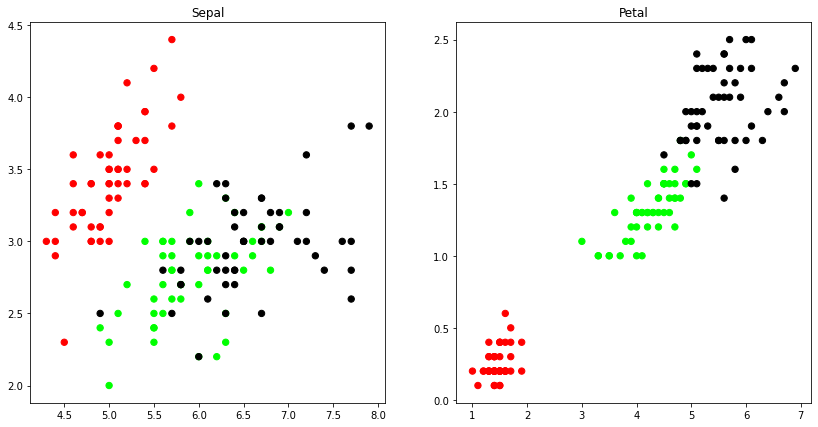

In [2]:
# import some data to play with
iris=datasets.load_iris()
X=pd.DataFrame(iris.data)
X.columns=['Sepal_length','Sepal_Width','Petal_length','Petal_Width']
# print(X)

y=pd.DataFrame(iris.target)
y.columns=['Targets']

# set the size of plot
plt.figure(figsize=(14,7))

# create a colormap
colormap=np.array(['red','lime','black'])

# plot sepal
plt.subplot(1,2,1)
plt.scatter(X.Sepal_length,X.Sepal_Width,c=colormap[y.Targets],s=40)
plt.title('Sepal')

# plot Petal
plt.subplot(1,2,2)
plt.scatter(X.Petal_length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Petal')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])

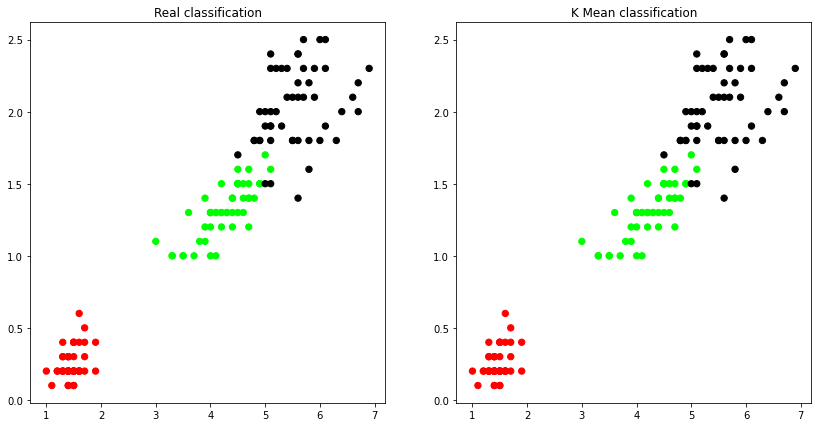

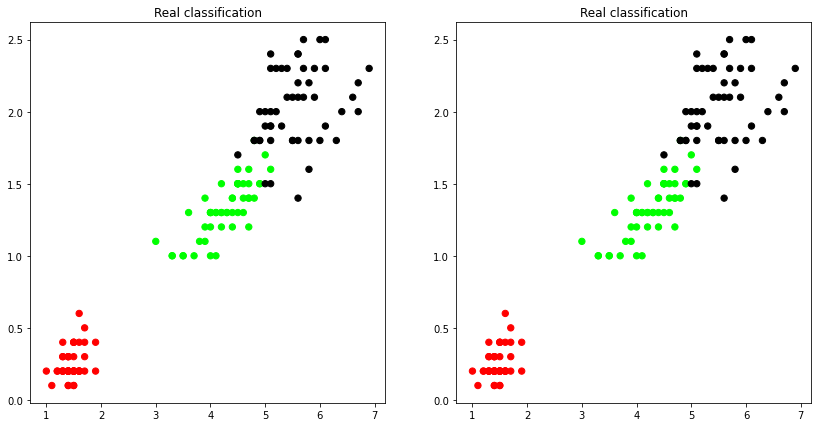

In [3]:
# KMeans cluster
model=KMeans(n_clusters=3)
model.fit(X)
# this is what kmeans thougth
model.labels_

# view the results
# set the size of plot
plt.figure(figsize=(14,7))

# create a colormap
colormap=np.array(['red','lime','black'])

# plot the original classification
plt.subplot(1,2,1)
plt.scatter(X.Petal_length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real classification')

# plot model classification
plt.subplot(1,2,2)
plt.scatter(X.Petal_length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('K Mean classification')

# the file we convert all 1's to 0's and 0's to 1's
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)
print(predY)

# view results
# set the size of plot
plt.figure(figsize=(14,7))
# create colormap
colormap=np.array(['red','lime','black'])

# plot the origial
plt.subplot(1,2,1)
plt.scatter(X.Petal_length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real classification')

# plot model classification
plt.subplot(1,2,2)
plt.scatter(X.Petal_length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real classification')

# accuracy
sm.accuracy_score(y,model.labels_)

# confusion matrix
sm.confusion_matrix(y,model.labels_)

array([[ 0,  0, 50],
       [45,  5,  0],
       [ 0, 50,  0]])

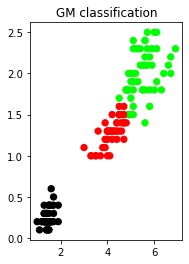

In [4]:
# Guassian Mixture Modelling
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)
xs.sample(5)

from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)

y_cluster_gmm=gmm.predict(xs)
y_cluster_gmm

plt.subplot(1,2,1)
plt.scatter(X.Petal_length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title('GM classification')

# accuracy
sm.accuracy_score(y,y_cluster_gmm)

# confusion matrix
sm.confusion_matrix(y,y_cluster_gmm)

# so the GMM clustering matched the true labels more closely than the KMeans
# as expected from plots.